In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd

In [2]:
##Part-1.1 & 1.2

In [3]:
def hist(img, L=256):
    ans = [0]*L
    for pixel in img.flatten():
        ans[pixel]+=1
    return ans

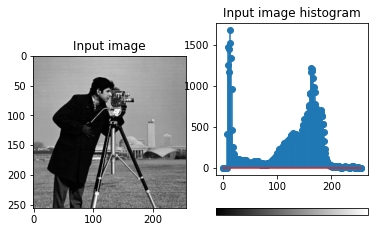

In [4]:
input_img = cv2.imread('cameraman.tif', cv2.IMREAD_GRAYSCALE)

input_hist=hist(input_img)
plt.subplot(1,2,1)
plt.imshow(input_img, cmap='gray')
plt.title('Input image')

plt.subplot(1,2,2)
plt.stem(input_hist, use_line_collection=True)
plt.title('Input image histogram')
plt.colorbar(orientation="horizontal",ticks=[])
# plt.imshow(input_img, cmap='gray')

(256, 256)


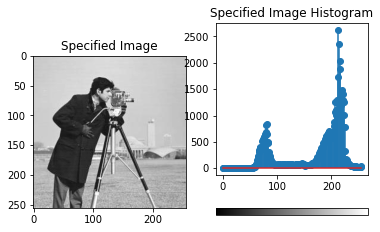

In [5]:
specified_img = cv2.imread('specified image.jpg', cv2.IMREAD_GRAYSCALE)
print(specified_img.shape)
# print(specified_img)
plt.subplot(1,2,1)
plt.imshow(specified_img, cmap='gray')
plt.title('Specified Image')
plt.subplot(1,2,2)
specified_hist=hist(specified_img)
plt.stem(specified_hist, use_line_collection=True)
plt.title('Specified Image Histogram')
plt.colorbar(orientation="horizontal",ticks=[])

In [6]:
## Part-3

In [7]:
def compute_transfer(img_hist, img, L=256):
    cumsum=[0] * L
    cumsum[0] = img_hist[0]
    
    for idx in range(1,len(cumsum)):
        cumsum[idx]=cumsum[idx-1] + img_hist[idx]
    
    num_pixels= len(img.flatten())
    cumsum=[round( ((L-1)/num_pixels) * val) for val in cumsum]
    
    return cumsum

In [8]:
specified_transfer = compute_transfer(specified_hist, specified_img)
input_transfer = compute_transfer(input_hist, input_img)

Text(0, 0.5, 's=T(r)')

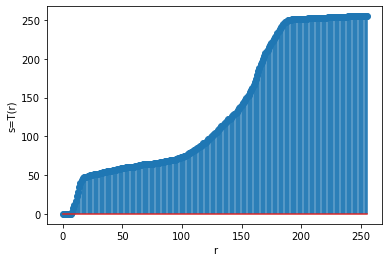

In [9]:
plt.stem(input_transfer,use_line_collection=True)
plt.xlabel('r')
plt.ylabel('s=T(r)')

Text(0, 0.5, 'G(z)')

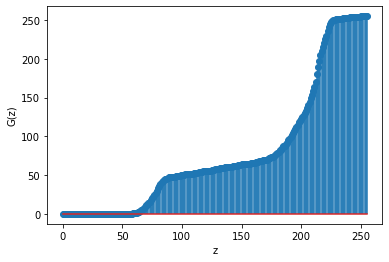

In [10]:
plt.stem(specified_transfer, use_line_collection=True)
plt.xlabel('z')
plt.ylabel('G(z)')

In [11]:
pd.DataFrame(input_transfer).describe()
    

,0
count,256.000000
mean,136.746094
std,87.300619
min,0.000000
25%,62.750000
50%,104.000000
75%,250.250000
max,255.000000


In [12]:
pd.DataFrame(specified_transfer).describe()


,0
count,256.000000
mean,79.117188
std,82.923175
min,0.000000
25%,2.750000
50%,57.500000
75%,99.750000
max,255.000000


In [13]:
print(input_transfer)
print(specified_transfer)

[0, 0, 0, 0, 0, 0, 0, 0, 2, 7, 12, 17, 23, 28, 35, 40, 44, 46, 47, 48, 48, 49, 49, 50, 50, 50, 51, 51, 52, 52, 52, 53, 53, 53, 54, 54, 54, 55, 55, 56, 56, 56, 57, 57, 57, 57, 58, 58, 58, 59, 59, 59, 59, 60, 60, 60, 60, 61, 61, 61, 61, 62, 62, 62, 63, 63, 63, 64, 64, 64, 64, 64, 65, 65, 65, 65, 65, 66, 66, 66, 66, 66, 67, 67, 67, 67, 68, 68, 68, 68, 69, 69, 70, 70, 70, 71, 71, 72, 72, 73, 73, 74, 75, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 91, 92, 93, 94, 96, 97, 99, 100, 102, 103, 105, 106, 108, 109, 111, 113, 114, 116, 117, 119, 120, 122, 123, 124, 126, 127, 129, 130, 132, 134, 136, 138, 141, 143, 145, 147, 149, 152, 154, 157, 160, 163, 166, 170, 174, 179, 184, 188, 193, 196, 200, 204, 207, 210, 212, 215, 218, 220, 223, 225, 228, 230, 233, 236, 238, 241, 243, 245, 247, 248, 249, 250, 250, 250, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254,

In [14]:
## Part-4

In [15]:
def compute_mapping(input_transfer, specified_transfer):
    specified_table={}
    
    for z in range(len(specified_transfer)):
        #When more than one value of G(z) satisfies s, choose the smallest value of z by convention.
        g_z = specified_transfer[z]
        
        if(not(g_z in specified_table)):
            specified_table[g_z] = z
#     print(specified_table)
    
    mapping = [0] * len(input_transfer)
    for r in range(len(input_transfer)):
        
        diff= 1000
        t_r = input_transfer[r] #t_r=s
        for g_z in specified_table:
            
            if abs(t_r-g_z) < diff:
                diff= abs(t_r-g_z)
                z = specified_table[g_z]
                mapping[r] = z
    
    return mapping

<StemContainer object of 3 artists>

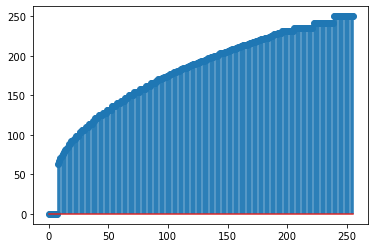

In [25]:
mapping=compute_mapping(input_transfer, specified_transfer)
plt.stem(mapping, use_line_collection=True)
plt.xlabels('r')
plt.ylabels('z')
plt.title('Mapping between r & z')

In [26]:

dim=input_img.shape[0]*input_img.shape[1]
dim
np.zeros(dim).shape

(65536,)

In [27]:
def compute_output_image(input_img, mapping):    
    flattened_img = input_img.flatten()
    
    output=np.zeros(len(flattened_img))
    
    for idx in range(len(flattened_img)):
        pixel=flattened_img[idx]
        output[idx] = mapping[pixel]
    return output

In [28]:
output=compute_output_image(input_img,mapping)

In [29]:
output.shape

(65536,)

In [30]:
output=output.reshape(input_img.shape[0], input_img.shape[1])
output=output.astype('uint8')

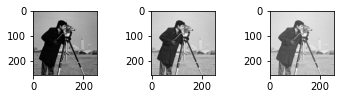

In [31]:
plt.subplot(3,3,1)
plt.imshow(input_img, cmap='gray')
plt.subplot(3,3,2)
plt.imshow(specified_img, cmap='gray')
plt.subplot(3,3,3)
plt.imshow(output, cmap='gray')


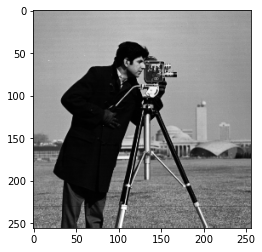

In [32]:
plt.imshow(input_img, cmap='gray')


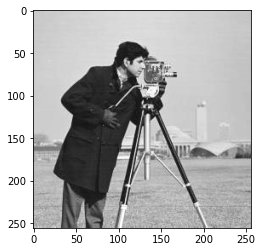

In [33]:
plt.imshow(specified_img, cmap='gray')


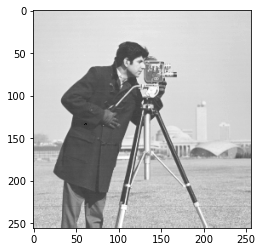

In [34]:
plt.imshow(output, cmap='gray')


<StemContainer object of 3 artists>

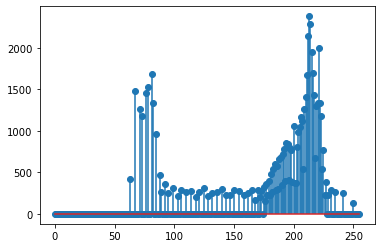

In [35]:
plt.stem(hist(output), use_line_collection=True)

Text(0.5, 1.0, 'Output Image histogram')

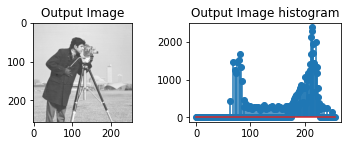

In [36]:
plt.subplot(2,2,1)
plt.imshow(output, cmap='gray')
plt.title('Output Image')
plt.subplot(2,2,2)
plt.stem(hist(output),use_line_collection=True)
plt.title('Output Image histogram')